<a href="https://www.kaggle.com/code/muhammedtausif/bangladesh-medicine-analytics?scriptVersionId=103765822" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Credit: The original work by AHMED SHAHRIAR SAKIB (@ahmedshahriarsakib) https://www.kaggle.com/code/ahmedshahriarsakib/bangladesh-medicine-analytics

<div style='background-color:red; color:yellow; padding:10px; text-align:center; font-size:50px'>
Medicine Analytics
</div>



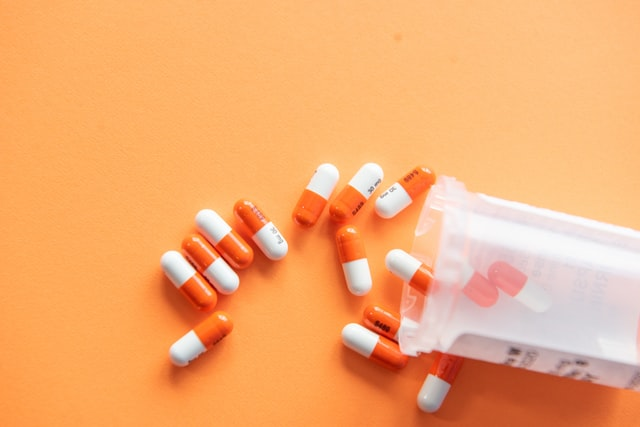


Photo by <a href="https://unsplash.com/@victoriabcphotographer?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Christina Victoria Craft</a> on <a href="https://unsplash.com/s/photos/medicine?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
    

  

# <div style='background-color:blue; color:yellow; padding:10px; text-align:center; font-size:30px'> Introduction </div>

In this project I will explore the medicine data from Bangladesh, perform some data cleaning and generate some insights.

### Dataset Source :
>#### [Assorted Medicine Dataset of Bangladesh](https://www.kaggle.com/ahmedshahriarsakib/assorted-medicine-dataset-of-bangladesh)

### Check the GitHub project below if you want to know more about the scraping process. I created a scrapy-django integrated REST API that scrapes the medicine data, transform them ( as per the model desing) and load it to PostgreSQL db
>### [https://github.com/ahmedshahriar/bd-medicine-scraper](https://github.com/ahmedshahriar/bd-medicine-scraper)

### If you like the dataset please use it on your project and share


# <div style='background-color:blue; color:yellow; padding:10px; text-align:center; font-size:30px'> Libraries and Configurations </div>

In [1]:
import re
import warnings

import pandas as pd
import numpy as np

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS # generate wordcloud
from bs4 import BeautifulSoup # clean html texts
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))



warnings. filterwarnings('ignore')


pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', 60)
# pd.set_option("display.max_colwidth", -1)

init_notebook_mode(connected=True) # to display plotly graph offline

%matplotlib inline

# <div style='background-color:blue; color:yellow; padding:10px; text-align:center; font-size:30px'> Medicine </div>
Load the dataset.

In [2]:
df_med = pd.read_csv('../input/assorted-medicine-dataset-of-bangladesh/medicine.csv', encoding = "utf-8")

In [3]:
df_med.head()

,brand id,brand name,type,slug,dosage form,generic,strength,manufacturer,package container,Package Size
0,4077,A-Cold,allopathic,a-coldsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 40.12,NaN
1,4006,A-Cof,allopathic,a-cofsyrup10-mg30-mg125-mg5-ml,Syrup,Dextromethorphan + Pseudoephedrine + Triprolidine,(10 mg+30 mg+1.25 mg)/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 100.00,NaN
2,6174,A-Clox,allopathic,a-cloxinjection500-mgvial,Injection,Cloxacillin Sodium,500 mg/vial,ACME Laboratories Ltd.,"500 mg vial: ৳ 28.43,(5's pack: ৳ 142.15),",(5's pack: ৳ 142.15)
3,6173,A-Clox,allopathic,a-cloxinjection250-mgvial,Injection,Cloxacillin Sodium,250 mg/vial,ACME Laboratories Ltd.,"250 mg vial: ৳ 20.00,(5's pack: ৳ 100.00),",(5's pack: ৳ 100.00)
4,6172,A-Clox,allopathic,a-cloxpowder-for-suspension125-mg5-ml,Powder for Suspension,Cloxacillin Sodium,125 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 45.00,NaN


In [4]:
df_med.shape

(21714, 10)

In [5]:
df_med.describe()

,brand id
count,21714.000000
mean,16370.435019
std,10289.034379
min,1.000000
25%,7374.250000
50%,14587.500000
75%,27078.750000
max,33198.000000


In [6]:
df_med.columns

Index(['brand id', 'brand name', 'type', 'slug', 'dosage form', 'generic',
       'strength', 'manufacturer', 'package container', 'Package Size'],
      dtype='object')

We don't need `ID` column as well as `slug` column, let's drop them both.

The `brand_id` column might be needed for analysis with associated data

In [7]:
df_med.drop(["brand id","slug"],axis=1, inplace=True)

# <div style='background-color:blue; color:yellow; padding:10px; text-align:center; font-size:30px'> Descriptive Analysis </div>

In [8]:
df_med.head()

,brand name,type,dosage form,generic,strength,manufacturer,package container,Package Size
0,A-Cold,allopathic,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 40.12,NaN
1,A-Cof,allopathic,Syrup,Dextromethorphan + Pseudoephedrine + Triprolidine,(10 mg+30 mg+1.25 mg)/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 100.00,NaN
2,A-Clox,allopathic,Injection,Cloxacillin Sodium,500 mg/vial,ACME Laboratories Ltd.,"500 mg vial: ৳ 28.43,(5's pack: ৳ 142.15),",(5's pack: ৳ 142.15)
3,A-Clox,allopathic,Injection,Cloxacillin Sodium,250 mg/vial,ACME Laboratories Ltd.,"250 mg vial: ৳ 20.00,(5's pack: ৳ 100.00),",(5's pack: ৳ 100.00)
4,A-Clox,allopathic,Powder for Suspension,Cloxacillin Sodium,125 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 45.00,NaN


In [9]:
printmd(f"Medicine dataset Dimension: ~**{df_med.shape[0]}** medicines,  **{df_med.shape[1]}** columns")

Medicine dataset Dimension: ~**21714** medicines,  **8** columns

In [10]:
df_med.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21714 entries, 0 to 21713
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand name         21714 non-null  object
 1   type               21714 non-null  object
 2   dosage form        21714 non-null  object
 3   generic            21712 non-null  object
 4   strength           20865 non-null  object
 5   manufacturer       21714 non-null  object
 6   package container  21672 non-null  object
 7   Package Size       13935 non-null  object
dtypes: object(8)
memory usage: 1.3+ MB


### Checking Duplicates

In [11]:
print('Known observations: {}\nUnique observations: {}'.format(len(df_med.index),len(df_med.drop_duplicates().index)))

printmd("**No duplicates Found!**")

Known observations: 21714
Unique observations: 21708


**No duplicates Found!**

### Summary of Features

In [12]:
df_med.describe(include=['object']).T

,count,unique,top,freq
brand name,21714,13934,Renova,9
type,21714,2,allopathic,21363
dosage form,21714,112,Tablet,9329
generic,21712,1661,Cefixime Trihydrate,341
strength,20865,1033,500 mg,1298
manufacturer,21714,232,Incepta Pharmaceuticals Ltd.,1182
package container,21672,7364,"Unit Price: ৳ 10.00,(30's pack: ৳ 300.00),",505
Package Size,13935,3531,(30's pack: ৳ 300.00),509


### Missing Values

In [13]:
def missing_value_describe(data):
    # check missing values in the data
    total = data.isna().sum().sort_values(ascending=False)
    missing_value_pct_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_pct_stats > 0)

    # missing_value_stats = missing_value_pct_stats.sort_values(ascending=False)[:missing_value_col_count]
    missing_data = pd.concat([total, missing_value_pct_stats], axis=1, keys=['Total', 'Percentage(%)'])

    print("Number of rows with at least 1 missing values:", data.isna().any(axis = 1).sum())
    print("Number of columns with missing values:", missing_value_col_count)

    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        display(missing_data[:missing_value_col_count])

        # plot missing values
        missing = data.isnull().sum()
        missing = missing[missing > 0]
        missing.sort_values(inplace=True)
        missing.plot.bar(figsize=(10,8))
    else:
        print("No missing data!!!")

Number of rows with at least 1 missing values: 8235
Number of columns with missing values: 4

Missing percentage (desceding):


,Total,Percentage(%)
Package Size,7779,35.824813
strength,849,3.909920
package container,42,0.193424
generic,2,0.009211


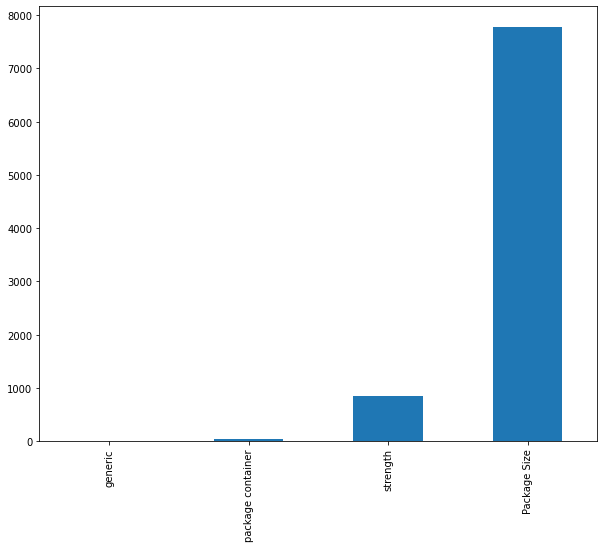

In [14]:
missing_value_describe(df_med)

#### Observation
> `Package Size` column has the highest number of missing values (~36%), because around 30%+

# <div style='background-color:blue; color:yellow; padding:10px; text-align:center; font-size:30px'> Visualization </div>

### Medicine Types

In [15]:
fig = px.pie(df_med['type'].value_counts().reset_index().rename(columns={'index':'Type', 'type':'count'}), values='count', names='Type', title='Medicine Types')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
printmd("#### Huge gap between allopathic and herbal medicines")

#### Huge gap between allopathic and herbal medicines

## Top Dosage Forms

### Utility Function

In [16]:
def top_plot(col_name, rows):
    # https://stackoverflow.com/a/50169502/11105356
    tdf = pd.concat([df_med[col_name].value_counts(), df_med[col_name]
               .value_counts(normalize=True)], 
              axis=1, keys=('counts','percentage')).reset_index().rename(columns={'index':col_name.title()}).head(rows)

    # https://stackoverflow.com/a/65242391/11105356
    tdf['count_pct'] =  tdf['counts'].astype(str) + tdf['percentage'].apply(lambda x: ' ({0:1.2f}%)'.format(x))

    # https://stackoverflow.com/a/63571261/11105356
    fig = px.bar(tdf,
                x=col_name.title(),
                 y='counts', 
                 title='Top '+col_name.title(),
                 text= 'count_pct' )
    fig.update_layout(yaxis_title="Count")
    # fig.update_traces(textposition='inside')
    fig.show()

In [17]:
col_name = 'dosage form'
top_plot(col_name, 10)

## Top Manufacturer

In [18]:
col_name = 'manufacturer'
top_plot(col_name, 10)

## Top Generics

In [19]:
col_name = 'generic'
top_plot(col_name, 10)

## Top Medicine Strength

In [20]:
col_name = 'strength'
top_plot(col_name, 10)

## Price

In [21]:
df_med[['dosage form', 'package container']].head(25)
# df_med['Package Size']

,dosage form,package container
0,Syrup,100 ml bottle: ৳ 40.12
1,Syrup,100 ml bottle: ৳ 100.00
2,Injection,"500 mg vial: ৳ 28.43,(5's pack: ৳ 142.15),"
3,Injection,"250 mg vial: ৳ 20.00,(5's pack: ৳ 100.00),"
4,Powder for Suspension,100 ml bottle: ৳ 45.00
5,Capsule,"Unit Price: ৳ 5.98,(100's pack: ৳ 598.00),"
6,Tablet,"Unit Price: ৳ 2.50,(20's pack: ৳ 50.00),"
7,Tablet,"Unit Price: ৳ 1.43,(100's pack: ৳ 143.00),"
8,Tablet,"Unit Price: ৳ 6.00,(50's pack: ৳ 300.00),"
9,Tablet,"Unit Price: ৳ 7.50,(30's pack: ৳ 225.00),"


### Data Cleaning

>Most of the medicines are tablet, soft gelatin, capsule and their variants and their pricing data have similar patterns that includes unit price. I will extract the unit price of these types of medicines.


In [22]:
# remove the null rows from the package size columns
df_package_not_null = df_med.dropna(subset=['Package Size'])

#### Overview of `Package Size` Values

In [23]:
df_package_not_null.head(8)

,brand name,type,dosage form,generic,strength,manufacturer,package container,Package Size
2,A-Clox,allopathic,Injection,Cloxacillin Sodium,500 mg/vial,ACME Laboratories Ltd.,"500 mg vial: ৳ 28.43,(5's pack: ৳ 142.15),",(5's pack: ৳ 142.15)
3,A-Clox,allopathic,Injection,Cloxacillin Sodium,250 mg/vial,ACME Laboratories Ltd.,"250 mg vial: ৳ 20.00,(5's pack: ৳ 100.00),",(5's pack: ৳ 100.00)
5,A-Clox,allopathic,Capsule,Cloxacillin Sodium,500 mg,ACME Laboratories Ltd.,"Unit Price: ৳ 5.98,(100's pack: ৳ 598.00),",(100's pack: ৳ 598.00)
6,A-Care,allopathic,Tablet,Betacarotene + Vitamin C + Vitamin E,6 mg+200 mg+50 mg,Asiatic Laboratories Ltd.,"Unit Price: ৳ 2.50,(20's pack: ৳ 50.00),",(20's pack: ৳ 50.00)
7,A-Card,allopathic,Tablet,Isosorbide Mononitrate,20 mg,ACME Laboratories Ltd.,"Unit Price: ৳ 1.43,(100's pack: ৳ 143.00),",(100's pack: ৳ 143.00)
8,A-Calm,allopathic,Tablet,Tolperisone Hydrochloride,50 mg,ACME Laboratories Ltd.,"Unit Price: ৳ 6.00,(50's pack: ৳ 300.00),",(50's pack: ৳ 300.00)
9,A-Cal DX,allopathic,Tablet,Calcium Carbonate [Elemental source] + Vitamin D3,500 mg+400 IU,ACME Laboratories Ltd.,"Unit Price: ৳ 7.50,(30's pack: ৳ 225.00),",(30's pack: ৳ 225.00)
10,A-Cal D,allopathic,Tablet,Calcium Carbonate [Elemental source] + Vitamin D3,500 mg+200 IU,ACME Laboratories Ltd.,"Unit Price: ৳ 6.50,(15's pack: ৳ 97.50),,Unit Price: ৳ 6...","(15's pack: ৳ 97.50),(30's pack: ৳ 195.00)"


In [24]:
df_package_not_null.tail(10)

,brand name,type,dosage form,generic,strength,manufacturer,package container,Package Size
21700,Zoxan,allopathic,Tablet,Nitazoxanide,500 mg,Opsonin Pharma Ltd.,"Unit Price: ৳ 10.07,(18's pack: ৳ 181.26),",(18's pack: ৳ 181.26)
21702,Zox,allopathic,Tablet,Nitazoxanide,500 mg,Square Pharmaceuticals Ltd.,"Unit Price: ৳ 10.07,(30's pack: ৳ 302.10),",(30's pack: ৳ 302.10)
21703,Zovia Teen G,allopathic,Tablet,Multivitamin & Multimineral [A-Z teen girls preparation],NaN,Opsonin Pharma Ltd.,"Unit Price: ৳ 6.00,(30's pack: ৳ 180.00),",(30's pack: ৳ 180.00)
21704,Zovia Teen B,allopathic,Tablet,Multivitamin & Multimineral [A-Z teen boys preparation],NaN,Opsonin Pharma Ltd.,"Unit Price: ৳ 6.00,(30's pack: ৳ 180.00),",(30's pack: ৳ 180.00)
21705,Zovia Silver,allopathic,Tablet,Multivitamin & Multimineral [A-Z silver preparation],NaN,Opsonin Pharma Ltd.,"Unit Price: ৳ 9.50,(30's pack: ৳ 285.00),,Unit Price: ৳ ...","(30's pack: ৳ 285.00),(60's pack: ৳ 570.00)"
21707,Zytix,allopathic,Tablet,Abiraterone Acetate,250 mg,Beacon Pharmaceuticals Ltd.,"Unit Price: ৳ 580.00,(6's pack: ৳ 3,480.00),","(6's pack: ৳ 3,480.00)"
21708,Zytiga,allopathic,Tablet,Abiraterone Acetate,250 mg,Janssen-Cilag,"Unit Price: ৳ 1,665.82,(120's pack: ৳ 199,898.40),","(120's pack: ৳ 199,898.40)"
21709,Zytec,allopathic,Tablet,Cetirizine Hydrochloride,10 mg,Desh Pharmaceuticals Ltd.,"Unit Price: ৳ 1.50,(100's pack: ৳ 150.00),",(100's pack: ৳ 150.00)
21711,Zymet Pro,allopathic,Capsule,Pancreatin,325 mg,Beximco Pharmaceuticals Ltd.,"Unit Price: ৳ 10.00,(90's pack: ৳ 900.00),,Unit Price: ৳...","(90's pack: ৳ 900.00),(60's pack: ৳ 600.00)"
21712,Zymet,allopathic,Tablet,Pancreatin,325 mg,Beximco Pharmaceuticals Ltd.,"Unit Price: ৳ 3.50,(100's pack: ৳ 350.00),",(100's pack: ৳ 350.00)


#### Insights


1. There are many cases where `Package Size` contains two or more values depending on the container.

> For example - check the 5th index row `Package Size`  value - `(15's pack: ৳ 97.50),(30's pack: ৳ 195.00)`

2. Also we have to watch out for the comma inside price value.

> For example - check the 4th index from bottom `Package Size`  value `(120's pack: ৳ 199,898.40)`


Therefore, we can split the column by applying a regex pattern **comma (,)** followed by **opening first bracket** and explode afterwards that will generate additional row/data points based on the `Package Size`. It counts as separate medicine (as product) 

In [25]:
df_package_not_null["Package Size"] = df_package_not_null["Package Size"].apply(lambda x: x.split(r',('))

#### Splitted Data

In [26]:
df_package_not_null["Package Size"][:10]

2                           [(5's pack: ৳ 142.15)]
3                           [(5's pack: ৳ 100.00)]
5                         [(100's pack: ৳ 598.00)]
6                           [(20's pack: ৳ 50.00)]
7                         [(100's pack: ৳ 143.00)]
8                          [(50's pack: ৳ 300.00)]
9                          [(30's pack: ৳ 225.00)]
10    [(15's pack: ৳ 97.50), 30's pack: ৳ 195.00)]
11                        [(100's pack: ৳ 500.00)]
12                         [(100's pack: ৳ 86.00)]
Name: Package Size, dtype: object

In [27]:
df_package_not_null["Package Size"].tail(10)

21700                          [(18's pack: ৳ 181.26)]
21702                          [(30's pack: ৳ 302.10)]
21703                          [(30's pack: ৳ 180.00)]
21704                          [(30's pack: ৳ 180.00)]
21705    [(30's pack: ৳ 285.00), 60's pack: ৳ 570.00)]
21707                         [(6's pack: ৳ 3,480.00)]
21708                     [(120's pack: ৳ 199,898.40)]
21709                         [(100's pack: ৳ 150.00)]
21711    [(90's pack: ৳ 900.00), 60's pack: ৳ 600.00)]
21712                         [(100's pack: ৳ 350.00)]
Name: Package Size, dtype: object

#### Explode Multiple Medicines

**Based on Pack Size**

In [28]:
df_package_not_null = df_package_not_null.explode("Package Size").reset_index().drop("index",1)

In [29]:
df_package_not_null.tail(10)

,brand name,type,dosage form,generic,strength,manufacturer,package container,Package Size
14345,Zovia Teen G,allopathic,Tablet,Multivitamin & Multimineral [A-Z teen girls preparation],NaN,Opsonin Pharma Ltd.,"Unit Price: ৳ 6.00,(30's pack: ৳ 180.00),",(30's pack: ৳ 180.00)
14346,Zovia Teen B,allopathic,Tablet,Multivitamin & Multimineral [A-Z teen boys preparation],NaN,Opsonin Pharma Ltd.,"Unit Price: ৳ 6.00,(30's pack: ৳ 180.00),",(30's pack: ৳ 180.00)
14347,Zovia Silver,allopathic,Tablet,Multivitamin & Multimineral [A-Z silver preparation],NaN,Opsonin Pharma Ltd.,"Unit Price: ৳ 9.50,(30's pack: ৳ 285.00),,Unit Price: ৳ ...",(30's pack: ৳ 285.00)
14348,Zovia Silver,allopathic,Tablet,Multivitamin & Multimineral [A-Z silver preparation],NaN,Opsonin Pharma Ltd.,"Unit Price: ৳ 9.50,(30's pack: ৳ 285.00),,Unit Price: ৳ ...",60's pack: ৳ 570.00)
14349,Zytix,allopathic,Tablet,Abiraterone Acetate,250 mg,Beacon Pharmaceuticals Ltd.,"Unit Price: ৳ 580.00,(6's pack: ৳ 3,480.00),","(6's pack: ৳ 3,480.00)"
14350,Zytiga,allopathic,Tablet,Abiraterone Acetate,250 mg,Janssen-Cilag,"Unit Price: ৳ 1,665.82,(120's pack: ৳ 199,898.40),","(120's pack: ৳ 199,898.40)"
14351,Zytec,allopathic,Tablet,Cetirizine Hydrochloride,10 mg,Desh Pharmaceuticals Ltd.,"Unit Price: ৳ 1.50,(100's pack: ৳ 150.00),",(100's pack: ৳ 150.00)
14352,Zymet Pro,allopathic,Capsule,Pancreatin,325 mg,Beximco Pharmaceuticals Ltd.,"Unit Price: ৳ 10.00,(90's pack: ৳ 900.00),,Unit Price: ৳...",(90's pack: ৳ 900.00)
14353,Zymet Pro,allopathic,Capsule,Pancreatin,325 mg,Beximco Pharmaceuticals Ltd.,"Unit Price: ৳ 10.00,(90's pack: ৳ 900.00),,Unit Price: ৳...",60's pack: ৳ 600.00)
14354,Zymet,allopathic,Tablet,Pancreatin,325 mg,Beximco Pharmaceuticals Ltd.,"Unit Price: ৳ 3.50,(100's pack: ৳ 350.00),",(100's pack: ৳ 350.00)


#### Processing Unit Price

Replace all comma inside price value, like - `(120's pack: ৳ 199,898.40)` will turn to `(120's pack: ৳ 199898.40)`

In [30]:
df_package_not_null["Package Size"] = df_package_not_null["Package Size"].apply(lambda x:x.replace(',', ''))

In [31]:
# https://stackoverflow.com/a/40840761/11105356
df_package_not_null['unit price'] = df_package_not_null['Package Size'].astype('str').str.extractall(r'(\d+(?:\.\d+)?)').groupby(level=0)[0].apply(list).apply(lambda x: float(x[1])/float(x[0]))

**Checking the unit price**

In [32]:
df_package_not_null['unit price']

0          28.43
1          20.00
2           5.98
3           2.50
4           1.43
          ...   
14350    1665.82
14351       1.50
14352      10.00
14353      10.00
14354       3.50
Name: unit price, Length: 14355, dtype: float64

In [33]:
printmd(f"Most expensive medicine unit price - **{df_package_not_null['unit price'].max():.2f}** and least expensive unit price - **{df_package_not_null['unit price'].min():.2f}**")

Most expensive medicine unit price - **9090.29** and least expensive unit price - **0.09**

### Most Expensive Medicine

In [34]:
df_package_not_null.loc[df_package_not_null['unit price'].idxmax()]

brand name                                                       Omnitrope
type                                                            allopathic
dosage form                                                   SC Injection
generic                                                         Somatropin
strength                                                       5 mg/1.5 ml
manufacturer                                  SANDOZ (A Novartis Division)
package container    1.5 ml cartridge: ৳ 9,090.29,(5's pack: ৳ 45,451.45),
Package Size                                        (5's pack: ৳ 45451.45)
unit price                                                         9090.29
Name: 9306, dtype: object

### Most Frequent Price 

In [35]:
# df_package_not_null['unit price'].hist()

fig = px.bar(df_package_not_null['unit price'].value_counts().reset_index().rename(columns={'index':'Unit Price', 'unit price':'Count'}).head(10), 
                   x='Unit Price', y='Count',
                   title='Most Frequent Price Distribution',
                   text_auto=True)
fig.update_layout(yaxis_title="Count")
fig.update_traces(textposition='inside')
fig.show()

> So unit price **BDT 10** is the most frequent price for medicines in Bangladesh

# <div style='background-color:blue; color:yellow; padding:10px; text-align:center; font-size:30px'> Generic </div>

In [36]:
df_generic = pd.read_csv('../input/assorted-medicine-dataset-of-bangladesh/generic.csv', 
                         na_filter=False # ignoring the null values
                        )

In [37]:
df_generic.columns

Index(['generic id', 'generic name', 'slug', 'monograph link', 'drug class',
       'indication', 'indication description', 'therapeutic class description',
       'pharmacology description', 'dosage description',
       'administration description', 'interaction description',
       'contraindications description', 'side effects description',
       'pregnancy and lactation description', 'precautions description',
       'pediatric usage description', 'overdose effects description',
       'duration of treatment description', 'reconstitution description',
       'storage conditions description', 'descriptions count'],
      dtype='object')

In [38]:
# dropping id and slug columns as we won't be needing it for analysis
df_generic.drop(["generic id","slug"],axis=1, inplace=True)

In [39]:
df_generic.head()

,generic name,monograph link,drug class,indication,indication description,therapeutic class description,pharmacology description,dosage description,administration description,interaction description,contraindications description,side effects description,pregnancy and lactation description,precautions description,pediatric usage description,overdose effects description,duration of treatment description,reconstitution description,storage conditions description,descriptions count
0,Adalimumab,https://medex.com.bd/attachments/FgGWUFrlD7LThDOJE9ArMGq...,Immunosuppressant,Ulcerative colitis,"<div class=""ac-body""><div class=""min-str-block""><div cla...","<div class=""ac-body"">Disease-modifying antirheumatic dru...","<div class=""ac-body"">Adalimumab is a recombinant human I...","<div class=""ac-body""><strong>Rheumatoid Arthritis, Psori...","<div class=""ac-body"">Administered by subcutaneous inject...","<div class=""ac-body"">Abatacept: Increased risk of seriou...","<div class=""ac-body"">Adalimumab should not be administer...","<div class=""ac-body"">The most common adverse reaction wi...","<div class=""ac-body"">Pregnancy Category B. Adequate and ...","<div class=""ac-body""><ul>\r\n<li><strong>Serious infecti...","<div class=""ac-body""><strong>Pediatric Use</strong>: Saf...","<div class=""ac-body"">The maximum tolerated dose of Adali...",,,"<div class=""ac-body"">Do not use beyond the expiration da...",13
1,Acyclovir + Hydrocortisone,https://medex.com.bd/attachments/hmi4dt8aYaBubgZ8AkKxlsm...,Hydrocortisone & Combined preparations,Herpes labialis,"<div class=""ac-body"">Acyclovir &amp; Hydrocortisone Crea...","<div class=""ac-body"">Hydrocortisone &amp; Combined prepa...","<div class=""ac-body"">Acyclovir is a synthetic purine nuc...","<div class=""ac-body"">The cream should be topically appli...",,,"<div class=""ac-body"">There is no known contraindication....","<div class=""ac-body"">The following most common adverse r...","<div class=""ac-body"">Pregnancy Category B. There are no ...","<div class=""ac-body"">Acyclovir and Hydrocortisone should...","<div class=""ac-body"">Safety and effectiveness in pediatr...",,,,"<div class=""ac-body"">Keep below 30°C temperature, away f...",10
2,Acyclovir (Topical),https://medex.com.bd/attachments/ENyoYKzQq8b7VMZE4lELf5n...,Topical Antiviral preparations,Sore lips,"<div class=""ac-body"">Acyclovir cream is a herpes simplex...","<div class=""ac-body"">Topical Antiviral preparations</div>","<div class=""ac-body"">Acyclovir is an antiviral drug acti...","<div class=""ac-body"">Acyclovir cream should be applied f...",,"<div class=""ac-body"">Clinical experience has identified ...","<div class=""ac-body"">Acyclovir cream is contraindicated ...","<div class=""ac-body"">The most common adverse reactions a...","<div class=""ac-body"">Pregnancy Category B. There are no ...","<div class=""ac-body"">Acyclovir cream should only be appl...","<div class=""ac-body""><strong>Pediatric Use</strong>: An ...",,,,"<div class=""ac-body"">Store Acyclovir cream at room tempe...",11
3,Acyclovir (Oral),https://medex.com.bd/attachments/zVc7h4TgucYev3wdbHFLiqL...,Herpes simplex & Varicella-zoster virus infections,Varicella zoster (chickenpox),"<div class=""ac-body"">Aciclovir is indicated for-<br>\r\n...","<div class=""ac-body"">Herpes simplex &amp; Varicella-zost...","<div class=""ac-body"">Aciclovir is a synthetic purine der...","<div class=""ac-body"">Treatment of initial herpes simplex...",,"<div class=""ac-body"">Probenecid reduces Aciclovir excret...","<div class=""ac-body"">Aciclovir is contraindicated in pat...","<div class=""ac-body"">Rash, gastrointestinal disturbance,...","<div class=""ac-body"">Pregnancy category B. Aciclovir sho...","<div class=""ac-body"">Aciclovir should be administered wi...",,,,,"<div class=""ac-body"">Should be stored below 25°C. It sho...",10
4,Acyclovir (Ophthalmic),https://medex.com.bd/attachments/Kz5fDjxpm2VFnag8dQCT5Zh...,Ophthalmic Anti-viral Products,Neonatal Conjunctivit

### Observation
> Columns with description (`indication description`, `dosage description` .... `storage conditions description`) are written in `HTML`

> We can parse those HTML files and convert them to text using `BeautifulSoup` package

## Parse HTML

In [40]:
df_generic["indication description"].apply(lambda x: BeautifulSoup(x).get_text().replace('\n',' '))

0       Adalimumab is a tumor necrosis factor (TNF) blocker indi...
1       Acyclovir & Hydrocortisone Cream is indicated for the ea...
2       Acyclovir cream is a herpes simplex virus (HSV) nucleosi...
3       Aciclovir is indicated for-  The treatment of viral infe...
4       Acyclovir is indicated for the treatment of Herpes simpl...
                                   ...                             
1706    Zinc Oxide helps treat and prevent diaper rash while it ...
1707    Oral zinc therapy is indicated in zinc deficiency and/or...
1708    Zidovudine, a nucleoside reverse transcriptase inhibitor...
1709    Zaleplon is indicated for the short-term treatment of in...
1710    Zafirlukast is indicated for the prophylaxis and chronic...
Name: indication description, Length: 1711, dtype: object

## Formatted Description 

In [41]:
# since I already ignored the `Null`/`Nan` value while reading the csv file (`na_filter=False`), I don't need to handle it now for parsing blank string/text

# df_generic_desc = df_generic.iloc[:,5:].applymap(lambda x: BeautifulSoup(x).get_text().replace('\n',' '))
# df_generic_desc.head()

### Storage Conditions

In [42]:
# df_generic_desc["storage conditions description"].value_counts()[:10]

#### Observation
> There are 173 null values, and the most frequent storage condition is - 
> **`Keep below 30°C temperature, away from light & moisture. Keep out of the reach of children.`**

#### Wordcloud

In [43]:
def wc_desc(col_name):
    processed_data = df_generic_desc[col_name].map(lambda x: re.sub('[,\.!?]', '', x).lower())
    stopwords = set(STOPWORDS) 
    txt_data = ','.join(list(processed_data.values))

    wc = WordCloud(width=800, height=400,background_color="white", max_font_size=300, stopwords = stopwords, max_words=5000,).generate(txt_data)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
    wc.to_file("storage_conditions_word_cloud.png")

In [44]:
# wc_desc("storage conditions description")

> So words like **`reach`**, **`dry`**, **`light`**, **`moisture`**, **`store`**, **`children`**, **`temperature`**, **`keep`** are frequently used in **`storage conditions description`**

# <div style='background-color:blue; color:yellow; padding:10px; text-align:center; font-size:30px'> Manufacturer </div>

In [45]:
df_manf = pd.read_csv('../input/assorted-medicine-dataset-of-bangladesh/manufacturer.csv', encoding='utf-8')
df_manf.drop(["manufacturer id","slug"],axis=1, inplace=True)

df_manf.head()

,manufacturer name,generics count,brand names count
0,ACI Limited,352.0,687.0
1,ACME Laboratories Ltd.,410.0,696.0
2,Ad-din Pharmaceuticals Ltd.,70.0,104.0
3,Aexim Pharmaceuticals Ltd.,34.0,43.0
4,Al-Madina Pharmaceuticals Ltd.,49.0,76.0


In [46]:
printmd(f"There are **{df_manf.shape[0]}** Pharmaceutical Companies")

There are **240** Pharmaceutical Companies

## Medicine Selling Distribution

In [47]:
fig = px.histogram(df_manf, x="brand names count", text_auto=True)

fig.update_layout(
    title_text='Medicine Selling Distribution', # title of plot
    xaxis_title_text='Brand Names (Medicine) Count', # xaxis label
    yaxis_title_text='Number of Pharmaceutical Companies', # yaxis label
    bargap=0.05, # gap between bars of adjacent location coordinates
    bargroupgap=0.05 # gap between bars of the same location coordinates
)
fig.show()

### Observation
> Most of the pharmaceutical companies sell less than 100 different types of brand names

> Don't confuse medicine with brand names, different companies sell same generic medicine under different names.
Example - **`Paracetamol`** generic is sold as **`Napa`** by **`Beximco Pharmaceuticals Ltd.`** and **`Ace`** by **`Square Pharmaceuticals Ltd.`**

## Generic Distribution

In [48]:
fig = px.histogram(df_manf, x="generics count", text_auto=True)

fig.update_layout(
    title_text='Generic Count Distribution', # title of plot
    xaxis_title_text='Generic Count', # xaxis label
    yaxis_title_text='Number of Pharmaceutical Companies', # yaxis label
    bargap=0.05, # gap between bars of adjacent location coordinates
    bargroupgap=0.05 # gap between bars of the same location coordinates
)
fig.show()

## Top Pharmaceutical Company

In [49]:
df_manf.loc[df_manf['brand names count'].idxmax()]

manufacturer name    Incepta Pharmaceuticals Ltd.
generics count                              689.0
brand names count                          1188.0
Name: 69, dtype: object

In [50]:
df_manf.loc[df_manf['generics count'].idxmax()]

manufacturer name    Incepta Pharmaceuticals Ltd.
generics count                              689.0
brand names count                          1188.0
Name: 69, dtype: object

> ###  **`Incepta Pharmaceuticals Ltd.`** is the top seller in terms of generic as well as medicines/brand Names!!!

# <div style='background-color:blue; color:yellow; padding:10px; text-align:center; font-size:30px'> Dosage Form </div>

In [51]:
df_dosage = pd.read_csv('../input/assorted-medicine-dataset-of-bangladesh/dosage form.csv', encoding='utf-8')

In [52]:
df_dosage.columns

Index(['dosage form id', 'dosage form name', 'slug', 'brand names count'], dtype='object')

In [53]:
df_dosage.drop(["dosage form id","slug"],axis=1, inplace=True)

df_dosage.head()

,dosage form name,brand names count
0,Capsule (Sustained Release),65
1,Capsule (Modified Release),36
2,Capsule (Extended Release),9
3,Capsule (Delayed Release),438
4,Capsule (Controlled Release),4


In [54]:
df_dosage.loc[df_dosage['brand names count'].idxmax()]

dosage form name     Tablet
brand names count      9368
Name: 37, dtype: object

> ###  Most types of medicines are **`Tablet`**

# <div style='background-color:blue; color:yellow; padding:10px; text-align:center; font-size:30px'> Drug Class </div>

In [55]:
df_drug_class = pd.read_csv('../input/assorted-medicine-dataset-of-bangladesh/drug class.csv', encoding='utf-8')

In [56]:
df_drug_class.columns

Index(['drug class id', 'drug class name', 'slug', 'generics count'], dtype='object')

In [57]:
df_drug_class.drop(["drug class id","slug"],axis=1, inplace=True)

df_drug_class.head()

,drug class name,generics count
0,Anaphylaxis,1
1,Intracellular antibiotic,1
2,Glycopeptide,1
3,Fourth generation Cephalosporins,2
4,First generation Cephalosporins,4


In [58]:
df_drug_class.loc[df_drug_class['generics count'].idxmax()]

drug class name    Herbal and Nutraceuticals
generics count                           153
Name: 38, dtype: object

> ### Top Drug Class in terms of generic is **`Herbal and Nutraceuticals`** 

## Drug Class WordCloud

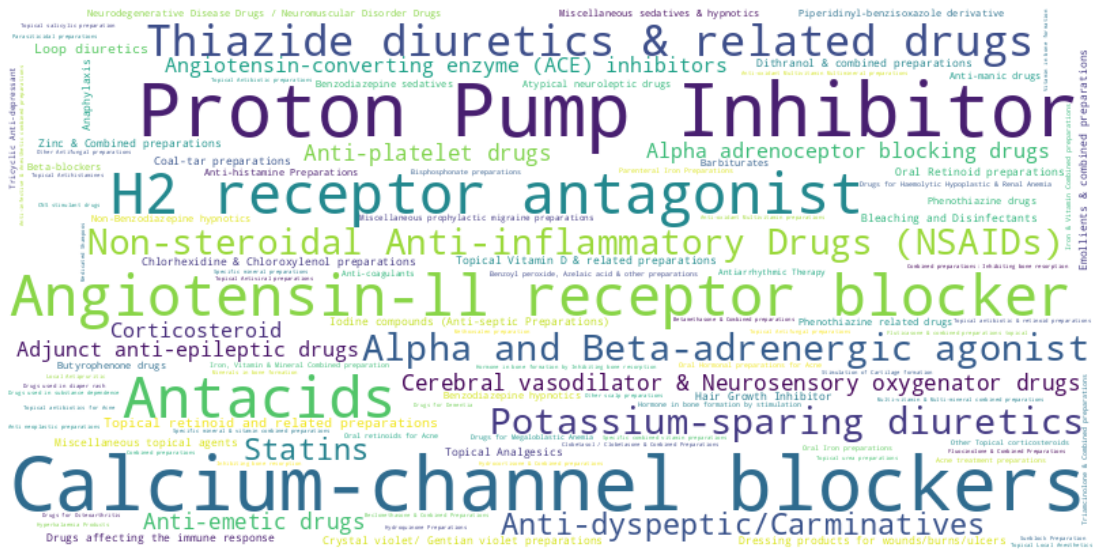

### These are the Most Frequent Drug Classes

In [59]:
data = df_drug_class['drug class name'].value_counts().to_dict()

wc = WordCloud(width=800, height=400,background_color="white", max_font_size=300).generate_from_frequencies(data)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

wc.to_file("drug_class_word_cloud.png")

printmd("### These are the Most Frequent Drug Classes")

# <div style='background-color:blue; color:yellow; padding:10px; text-align:center; font-size:30px'> Indication </div>

In [60]:
df_indication = pd.read_csv('../input/assorted-medicine-dataset-of-bangladesh/indication.csv', encoding='utf-8')

In [61]:
df_indication.columns

Index(['indication id', 'indication name', 'slug', 'generics count'], dtype='object')

In [62]:
df_indication.drop(["indication id","slug"],axis=1, inplace=True)

df_indication.head()

,indication name,generics count
0,Acrocyanosis,1
1,Acquired immunodeficiency syndrome (AIDS),10
2,Acne vulgaris,37
3,Acne rosacea,0
4,Acidosis,2


In [63]:
df_indication.loc[df_indication['generics count'].idxmax()]

indication name    Hypertension
generics count               65
Name: 879, dtype: object

> #### `Hypertension` is common indication for most generics

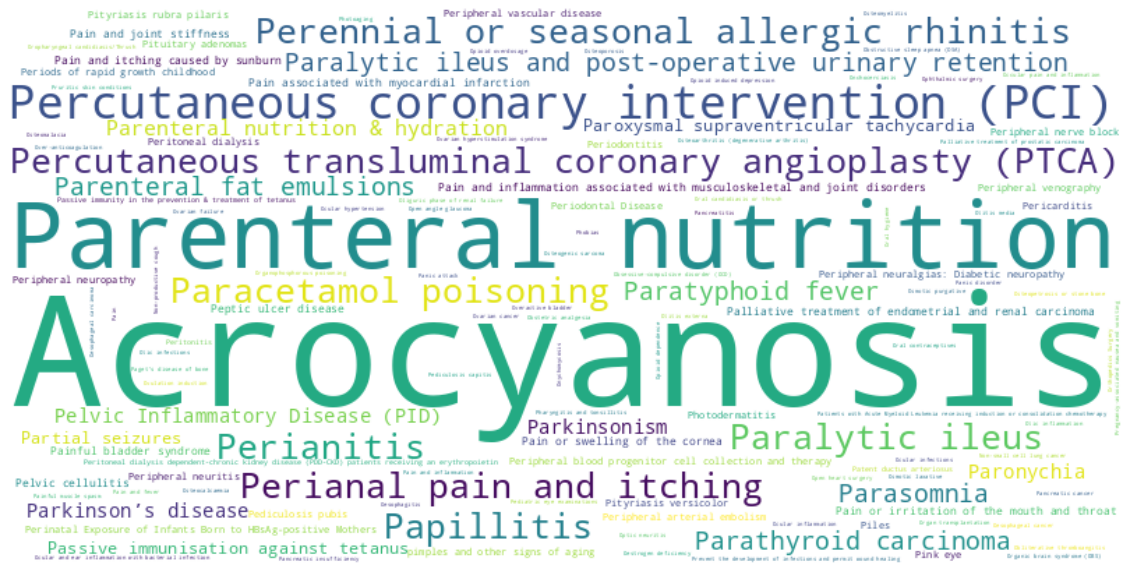

### These are the Most Frequent Indications

In [64]:
data = df_indication['indication name'].value_counts().to_dict()

wc = WordCloud(width=800, height=400,background_color="white", max_font_size=300).generate_from_frequencies(data)
plt.figure(figsize=(20,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

wc.to_file("indication_name_word_cloud.png")

printmd("### These are the Most Frequent Indications")

# <div style='background-color:blue; color:yellow; padding:10px; text-align:center; font-size:30px'> Conclusion </div>

In this notebook, I tried to present an overview of Bangladesh medicines. There is plenty of room for improvement.

A possible TODO list -   

- Extract `Price` for all possible medicine entries
- Extract pack size and pack container for all possible medicine entries
- Further analysis of Generic descriptions
- Further analysis of Indications and drug classes
- Validation of count features from `Indication`, `Drug Class`, `Dosage Form` and `Manufacturer` by using their respective names with `Medicine` and `Generic` dataset


<div style='background-color:red; color:yellow; padding:10px; text-align:center; font-size:25px'>
    Please give an upvote and share the notebook if you find it useful!<br/>
    Also if you like this dataset, use it and share<br/>
    <br/>
    If you have any questions, please do comment <br/>
    Thank you    
</div>